In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM,GRU
from tensorflow.keras.optimizers import Adam

# Short Distance Data

In [0]:
T = 10
D = 1
X = []
Y = []

def get_label(x,i1,i2,i3):

  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

In [0]:
for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,-1,-2,-3) # short distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Linear Model

In [0]:
i = Input(shape=(T,))
x = Dense(1,activation='sigmoid')(i)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(X,Y,epochs=100,
          validation_split=0.5)

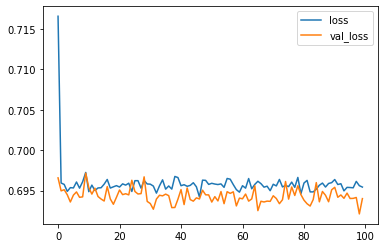

In [0]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

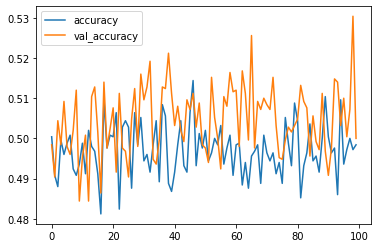

In [0]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## Simple RNN

In [0]:
X = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(X,Y,
          epochs=200,
          validation_split=0.5)

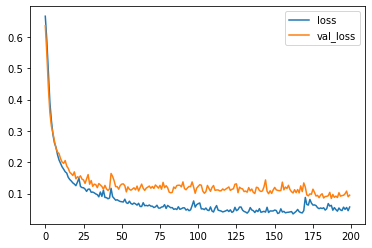

In [0]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

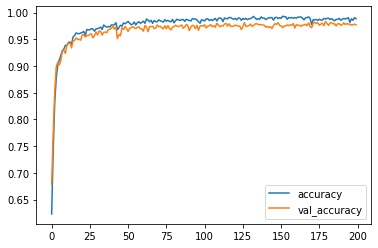

In [0]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Long Distance Data

In [0]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # short distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Simple RNN

In [0]:
inputs = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(inputs,Y,
          epochs=200,
          validation_split=0.5)

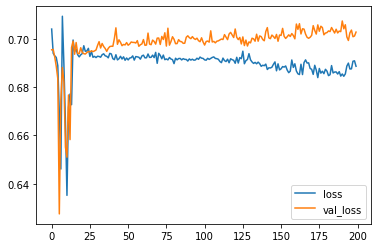

In [11]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

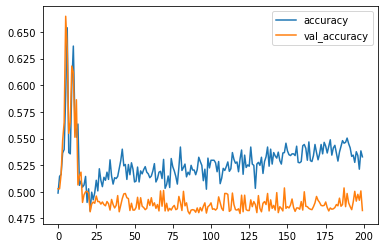

In [12]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## LSTM

In [0]:
inputs = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(inputs,Y,
          epochs=200,
          validation_split=0.5)

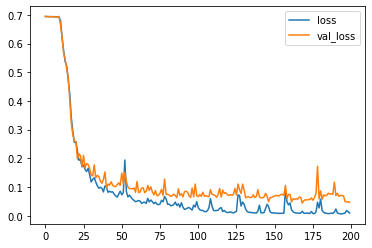

In [18]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

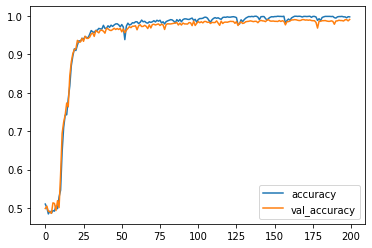

In [19]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Increasing the sequence length

In [0]:
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # short distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Simple RNN

In [0]:
inputs = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(inputs,Y,
          epochs=200,
          validation_split=0.5)

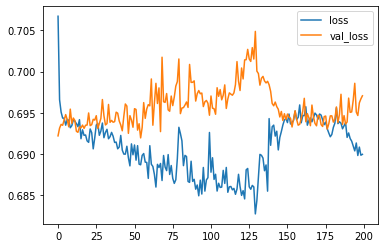

In [23]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

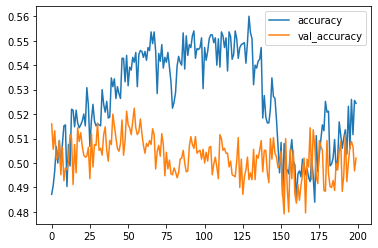

In [24]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## LSTM

In [0]:
inputs = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(inputs,Y,
          epochs=200,
          validation_split=0.5)

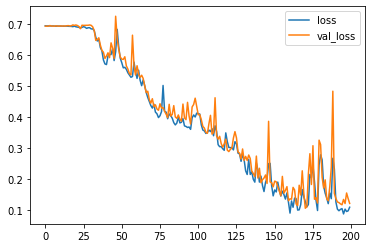

In [27]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

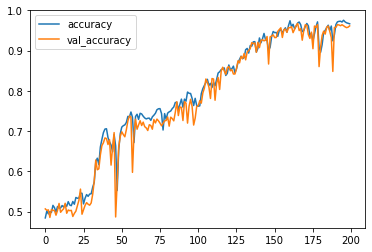

In [28]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## GRU

In [0]:
inputs = np.expand_dims(X,-1)

i = Input(shape=(T,D))
x = GRU(5)(i)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [0]:
model.fit(inputs,Y,
          validation_split=0.5,
          epochs=400)

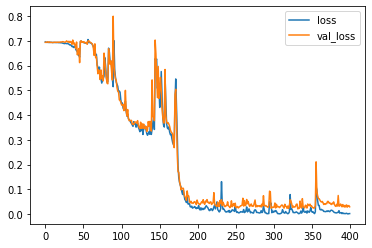

In [32]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

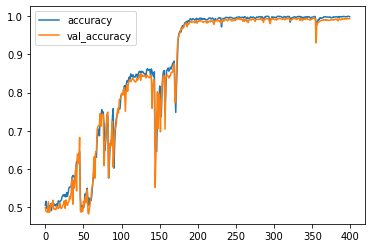

In [33]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()